# Task 2 - Prediction of store sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Get the merged data of the train and store

In [2]:
logging.info('fetch the csv data')
df = pd.read_csv('../data/merged.csv')
print(df.head(5))

   Id  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0   1          4  2015-07-31   5263        555     1      1            0   
1   2          4  2015-07-31   6064        625     1      1            0   
2   3          4  2015-07-31   8314        821     1      1            0   
3   4          4  2015-07-31  13995       1498     1      1            0   
4   5          4  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  CompetitionDistance  ...  IsMonthStart  IsMonthEnd  \
0              1               1270.0  ...         False        True   
1              1                570.0  ...         False        True   
2              1              14130.0  ...         False        True   
3              1                620.0  ...         False        True   
4              1              29910.0  ...         False        True   

   StoreType_a  StoreType_b  StoreType_c StoreType_d  Assortment_a  \
0        False        False         True

/tmp/ipykernel_11320/3855586499.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/merged.csv')


In [3]:
logging.info('check for missing values')
print(df.isnull().sum())

Id                           0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
IsMonthStart                 0
IsMonthEnd                   0
StoreType_a                  0
StoreType_b                  0
StoreType_c                  0
StoreType_d                  0
Assortment_a                 0
Assortment_b                 0
Assortment_c                 0
DayOfMonth                   0
dtype: int64


In [4]:
logging.info('fill missing values')
df['Promo2SinceWeek'].fillna(0, inplace=True)
df['Promo2SinceYear'].fillna(0, inplace=True)
df['PromoInterval'].fillna(0, inplace=True)

df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df['CompetitionOpenSinceYear'].fillna(0, inplace=True)

/tmp/ipykernel_11320/1314532227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promo2SinceWeek'].fillna(0, inplace=True)
/tmp/ipykernel_11320/1314532227.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [5]:
logging.info('check for missing values')
print(df.isnull().sum())

Id                           0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
IsMonthStart                 0
IsMonthEnd                   0
StoreType_a                  0
StoreType_b                  0
StoreType_c                  0
StoreType_d                  0
Assortment_a                 0
Assortment_b                 0
Assortment_c                 0
DayOfMonth                   0
dtype: int64


In [6]:
logging.info('Get additional paramaeters from the Date column')
df['DayOfMonth'] = pd.to_datetime(df['Date']).dt.day
df['IsMonthStart'] = pd.to_datetime(df['Date']).dt.is_month_start
df['IsMonthEnd'] = pd.to_datetime(df['Date']).dt.is_month_end 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Id                         1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   CompetitionDistance        1017209 non-null  float64
 10  CompetitionOpenSinceMonth  1017209 non-null  float64
 11  CompetitionOpenSinceYear   1017209 non-null  float64
 12  Promo2                     1017209 non-null  int64  
 13  Promo2SinceW

In [7]:
logging.info('Save the new features into the merged data')
df.to_csv('../data/merged.csv', index=False)

In [8]:
logging.info('one hot encoding for the categoriacal variables like store type and assortment')
if 'StoreType' in df.columns:
    df = pd.get_dummies(df, columns=['StoreType', 'Assortment'], drop_first=True, dtype=int)
if  'Assortment' in df.columns:
    df = pd.get_dummies(df, columns=['Assortment'], drop_first=True, dtype=int)
if 'StateHoliday' in df.columns:
    df = pd.get_dummies(df, columns=['StateHoliday'], drop_first=True, dtype=int)
print(df.head(5))

   Id  DayOfWeek        Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0   1          4  2015-07-31   5263        555     1      1              1   
1   2          4  2015-07-31   6064        625     1      1              1   
2   3          4  2015-07-31   8314        821     1      1              1   
3   4          4  2015-07-31  13995       1498     1      1              1   
4   5          4  2015-07-31   4822        559     1      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  ...  StoreType_c  \
0               1270.0                        9.0  ...         True   
1                570.0                       11.0  ...        False   
2              14130.0                       12.0  ...        False   
3                620.0                        9.0  ...         True   
4              29910.0                        4.0  ...        False   

   StoreType_d  Assortment_a  Assortment_b Assortment_c  DayOfMonth  \
0        False          True     

In [9]:
logging.info('Handling PromoInterval')
df['PromoInterval'] = df['PromoInterval'].fillna('0')
df['PromoMonths'] = df['PromoInterval'].apply(lambda x: len(str(x).split(',')) if x != '0' else 0)
df = df.drop('PromoInterval', axis=1)


In [10]:
logging.info("define the numerical columns")
numeric_cols = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 
                'CompetitionDistance', 'Promo2SinceYear', 'Promo2SinceWeek', 
                'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                'Year', 'Month', 'DayOfMonth', 'WeekOfYear',
                'IsMonthStart', 'IsMonthEnd']

In [11]:
logging.info('define the catagorical columns')
logging.info('Defining the categorical columns')
categorical_cols = [col for col in df.columns if col.startswith(('StoreType_', 'Assortment_', 'StateHoliday_'))]


In [12]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder


logging.info('define the transformer for the numerical columns')

numeric_transformer = Pipeline(steps=[('scalar', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [13]:
logging.info('update the preprocessor pipline')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [14]:
logging.info('regression pipline with the preprocessor and random forest regressor')
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [15]:
logging.info('split the data into X and Y')
X = df.drop(columns=['Date', 'Sales', 'Id'])
y = df['Sales']
df.dtypes
# print(df.head(5))

Id                             int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
SchoolHoliday                  int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
Year                           int64
Month                          int64
Day                            int64
WeekOfYear                     int64
IsMonthStart                    bool
IsMonthEnd                      bool
StoreType_a                     bool
StoreType_b                     bool
StoreType_c                     bool
StoreType_d                     bool
Assortment_a                    bool
Assortment_b                    bool
Assortment_c                    bool
D

In [16]:
logging.info('split the data into train and test')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train)
print(X_train.info())



        DayOfWeek  Customers  Open  Promo  SchoolHoliday  CompetitionDistance  \
417683          6          0     0      0              0                300.0   
659402          6          0     0      0              0               2190.0   
739873          4        749     1      0              0              38630.0   
109671          4        475     1      0              0               5830.0   
422541          2       1049     1      1              0               4380.0   
...           ...        ...   ...    ...            ...                  ...   
259178          6          0     0      0              0                250.0   
365838          4        866     1      0              1               8260.0   
131932          5       1097     1      0              0                250.0   
671155          3        561     1      1              0              17110.0   
121958          0       1011     1      1              0               1250.0   

        CompetitionOpenSinc

In [18]:
logging.info('Fitting the model')
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['DayOfWeek', 'Customers',
                                                   'Open', 'Promo',
                                                   'SchoolHoliday',
                                                   'CompetitionDistance',
                                                   'Promo2SinceYear',
                                                   'Promo2SinceWeek',
                                                   'CompetitionOpenSinceMonth',
                                                   'CompetitionOpenSinceYear',
                                                   'Year', 'Month',
                                                   'DayOfMonth', 'WeekOfYear',
                                                   'IsMonthStart',
                                                   'IsMonthEnd']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['StoreType_a', 'StoreType_b',
                                                   'StoreType_c', 'StoreType_d',
                                                   'Assortment_a',
                                                   'Assortment_b',
                                                   'Assortment_c',
                                                   'StateHoliday_0',
                                                   'StateHoliday_a',
                                                   'StateHoliday_b',
                                                   'StateHoliday_c'])])),
                ('regressor', RandomForestRegressor())])

In [19]:
logging.info('Making predictions')
y_pred = regression_pipeline.predict(X_test)



In [20]:
print(y_pred)

[    0.    5795.01  7532.36 ...  3105.44     0.   14877.95]


In [21]:
results = pd.DataFrame({
    'Actual_Sales': y_test,  # Replace with your actual sales target
    'Predicted_Sales': y_pred
})
print(results.head(10))  # Display a few rows of actual vs. predicted


        Actual_Sales  Predicted_Sales
76435              0             0.00
923026          5548          5795.01
731180          7467          7532.36
790350          3360          3587.16
252134         11414          9617.86
425310             0             0.00
666826         14126         14651.79
881992          6299          6510.42
783899         10515         10820.44
540518          7713          8344.59


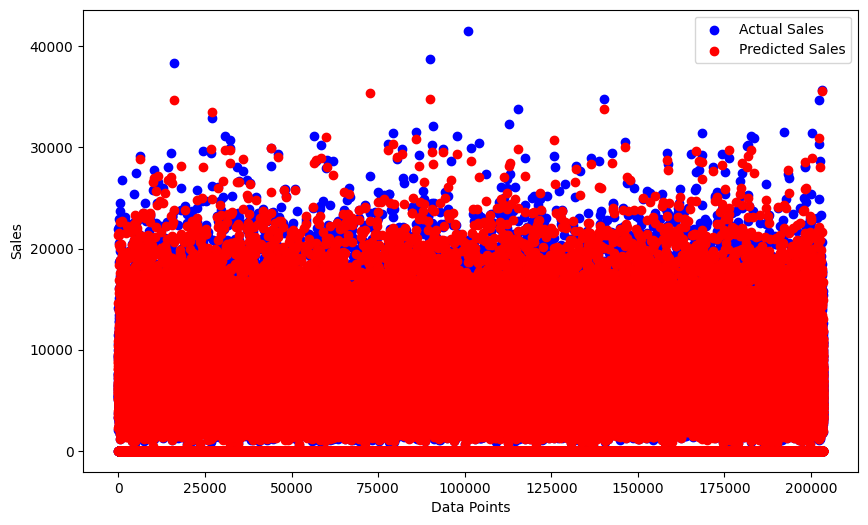

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [23]:
logging.info('Calculating RMSE')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 455.1919315745328


In [24]:
print(regression_pipeline.named_steps)

{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scalar', StandardScaler())]),
                                 ['DayOfWeek', 'Customers', 'Open', 'Promo',
                                  'SchoolHoliday', 'CompetitionDistance',
                                  'Promo2SinceYear', 'Promo2SinceWeek',
                                  'CompetitionOpenSinceMonth',
                                  'CompetitionOpenSinceYear', 'Year', 'Month',
                                  'DayOfMonth', 'WeekOfYear', 'IsMonthStart',
                                  'IsMonthEnd']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['StoreType_a', 'StoreType_b', 'StoreType_c',
                   

In [25]:
# Accessing the RandomForestRegressor from the pipeline
rf_model = regression_pipeline.named_steps['regressor']

# If you're using a ColumnTransformer for preprocessing, access it first
preprocessor = regression_pipeline.named_steps['preprocessor']  # Replace 'preprocessor' with the actual name

# Get the transformed feature names
feature_names = preprocessor.get_feature_names_out()

# Extracting feature importances
importance = rf_model.feature_importances_

# Ensure the lengths match
print(f'Number of transformed features: {len(feature_names)}')
print(f'Number of feature importances: {len(importance)}')

# Creating a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'feature': feature_names,  # Transformed feature names
    'importance': importance
})

# Sorting the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the top features
print(feature_importance_df.head(10))  # Adjust the number of top features to display


Number of transformed features: 27
Number of feature importances: 27
                           feature  importance
1                   num__Customers    0.860868
5         num__CompetitionDistance    0.032442
19           cat__StoreType_d_True    0.023834
3                       num__Promo    0.017640
21          cat__Assortment_b_True    0.009711
9    num__CompetitionOpenSinceYear    0.008125
7             num__Promo2SinceWeek    0.007967
8   num__CompetitionOpenSinceMonth    0.007441
17           cat__StoreType_b_True    0.006182
0                   num__DayOfWeek    0.005647


/tmp/ipykernel_11320/4208987519.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(top_n), palette='viridis')


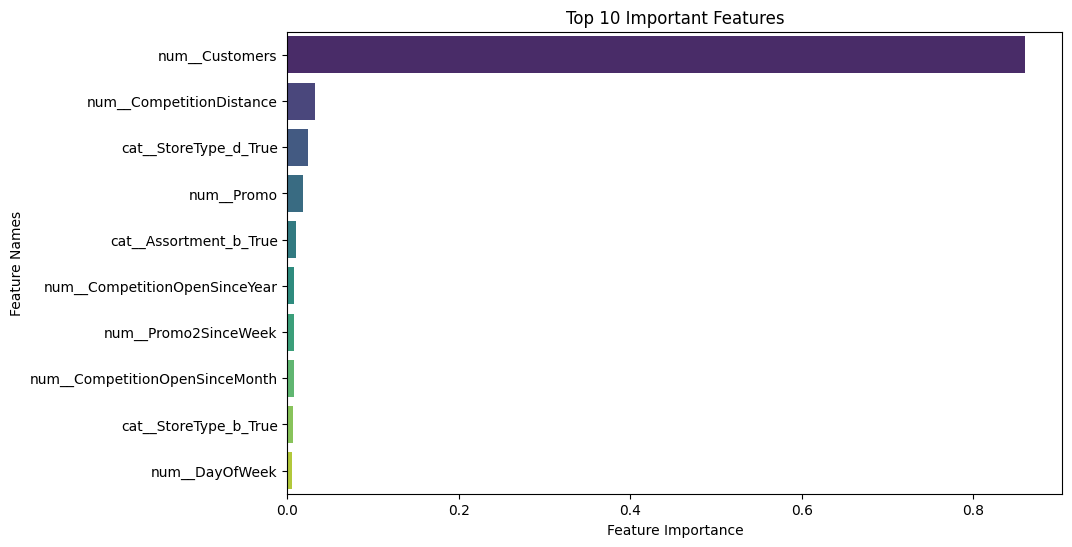

In [26]:
logging.info('show the feature importance with a plot')
top_n = 10  # You can adjust the number of features to display
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(top_n), palette='viridis')

# Adding labels and title
plt.title(f'Top {top_n} Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

# Show the plot
plt.show()

In [27]:
from sklearn.utils import resample
import numpy as np

def bootstrap_predictions(model, X_test, n_iterations=100):
    preds = []
    for i in range(n_iterations):
        X_sample = resample(X_test)
        preds_sample = model.predict(X_sample)
        preds.append(preds_sample)
    preds = np.array(preds)
    lower = np.percentile(preds, 2.5, axis=0)
    upper = np.percentile(preds, 97.5, axis=0)
    return lower, upper

lower_ci, upper_ci = bootstrap_predictions(regression_pipeline, X_test)
